## Mandlebrot set problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate a grid of points on the complex plane, see the data type of our numpy grid array is complex128

In [9]:
x,y = np.mgrid[-2:1:200j, -1.5:1.5:200j]
#generate 200 points within our range
c=x+1j*y
print(c.dtype)

complex128


Let's create a function to check whether each grid point in our array is in the mandelbrot set. Equivantly whether or not $\lim_{n \to \infty}$ $Z_{n+1}=Z_n^{2}+c$ diverges or converges 

In [10]:
def in_mandelbrot(points,threshold=50,max_iter=100):
    ''' param points: array, complex numbers which of grid  [−2, 1]×[−1.5, 1.5]
        param threshold: float, threshold to determine divergence, default 50 
        param max_iter: int, number of iterations to  test divergence, default is 100
        return mask: array, True/False booleans on whether each grid point diverges 
    '''
    z_val=np.zeros((points.shape[0],points.shape[1]),dtype=complex) 
    #Intialize array of zeros same size as grid points , dtype complex
    mask= np.ones((points.shape[0],points.shape[1]), dtype=bool) 
    #Intialize array of 1's same size as grid point, dtype Booleans 
    #Each index Mask maps 1:1 to points s.t. True-Doesn't Diverge; False-Diverges
    
    iter=0
    while iter<max_iter:
        mask[abs(z_val)**2>50]=False 
        #Boolean index any z_val above threshold as False (Diverges)
        z_val[mask ]=points[mask]+z_val[mask ]**2 
        #Update z_val|Mask=True with respective elements of points/z_val
        iter=iter+1
    return mask

In [11]:
z50=in_mandelbrot(c)

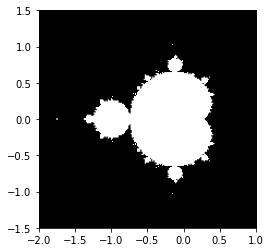

<Figure size 432x288 with 0 Axes>

In [14]:
plt.imshow(np.transpose(z50), extent=[-2, 1, -1.5, 1.5]) #plots transpose
plt.gray()
plt.show()
plt.savefig('mandelbrot.jpg')